1. Register at the competition [NTIRE2024 Portrait Quality Assessment ft. DXOMARK](https://codalab.lisn.upsaclay.fr/competitions/17311)

2. Download the dataset: https://corp.dxomark.com/data-base-piq23/

3. Download the starter kit `piq23_starter_kit` from here: https://codalab.lisn.upsaclay.fr/competitions/17311#participate-get_starting_kit

3. This notebook shows you how to load the testset and do a simple submission

In [1]:
!ls

 Details    Overall	       'PIQ23 Tutorial.ipynb'   Scores_Exposure.csv
 Exposure   piq23_starter_kit   Scores_Details.csv      Scores_Overall.csv


In [1]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
def load_img (filename, norm=True,):
    img = np.array(Image.open(filename).convert("RGB"))
    if norm:   
        img = img / 255.
        img = img.astype(np.float32)
    return img

In this challenge we use the Overall split:

<img src="https://i.ibb.co/fHT3VyN/ntire-piq-dataset.png" height="100" alt="ntire-piq-dataset" border="0" >

In [9]:
IMPATH = "Overall"

In [4]:
test_df = pd.read_csv("ntire24_overall_scene_test.csv")
print ("Test images", test_df.shape)
test_df.head()

Test images (1486, 8)


,IMAGE PATH,CI LOW,CI HIGH,CI RANGE,QUALITY LEVEL,IMAGE,SCENE,CONDITION
0,Overall\122_Indoor_Scene_1.tiff,-5.490593,-2.472769,3.017824,0,122_Indoor_Scene_1.tiff,Indoor_Scene_1,Indoor
1,Overall\182_Indoor_Scene_1.jpg,-4.383391,-2.709702,1.673689,0,182_Indoor_Scene_1.jpg,Indoor_Scene_1,Indoor
2,Overall\157_Indoor_Scene_1.jpg,-3.145343,-2.063702,1.081641,1,157_Indoor_Scene_1.jpg,Indoor_Scene_1,Indoor
3,Overall\185_Indoor_Scene_1.jpg,-3.585527,-1.882605,1.702923,1,185_Indoor_Scene_1.jpg,Indoor_Scene_1,Indoor
4,Overall\178_Indoor_Scene_1.jpg,-4.438320,-1.521308,2.917012,0,178_Indoor_Scene_1.jpg,Indoor_Scene_1,Indoor


In [5]:
## Keep the same order as in the csv
test_images = list(test_df["IMAGE"].values)
test_images[:3]

['122_Indoor_Scene_1.tiff', '182_Indoor_Scene_1.jpg', '157_Indoor_Scene_1.jpg']

Let's load the sample submission from the starter kit `pred_piq23.csv`
This submission corresponds to the baseline method from the paper: [An Image Quality Assessment Dataset for Portraits](https://openaccess.thecvf.com/content/CVPR2023/papers/Chahine_An_Image_Quality_Assessment_Dataset_for_Portraits_CVPR_2023_paper.pdf)

In [19]:
!ls piq23_starter_kit

ntire24_overall_scene_test.csv	 ntire_train_imgs.txt  requirements_ntire.txt
ntire24_overall_scene_train.csv  pred_piq23.csv
ntire_test_imgs.txt		 pred_piq23.zip


In [6]:
sample_submission = pd.read_csv("pred_piq23.csv")
sample_submission.head(5)

,Prediction,Class
0,-1.124943,1
1,-0.781387,1
2,-0.572976,1
3,-1.363007,1
4,-1.400985,1


You can replace the `Prediction` column with your method's predictions.

In this example I just generate a random number in `get_pscore()`, change the function to run your model.

In [7]:
def get_pscore(img):
    """
    Receives an image and returns the score.
    In this example I just return a random value.
    """
    return np.random.uniform(-0.1, high=.1, size=(1,))

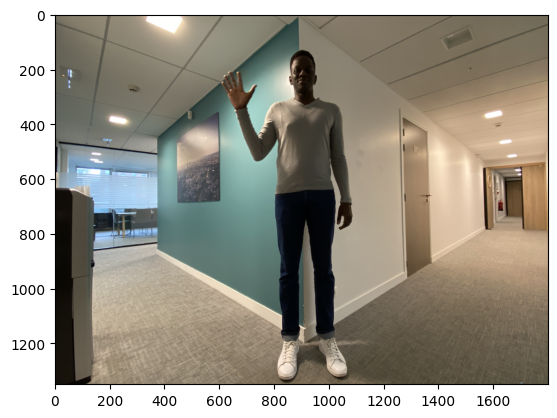

In [25]:
cnt = 0
my_scores = []


for ts_file in test_images:
    
    ts_img = load_img (os.path.join(IMPATH, ts_file))
    
    #### Run you quality metric here
    score = get_pscore(ts_img)
    my_scores.append(score)
    
    if cnt == 0:
        plt.imshow(ts_img)
        plt.show()
    cnt+=1

Now that you have the scores for all the images, you are ready to prepare the submission.

In [29]:
my_scores = np.array(my_scores)
assert sample_submission.shape[0] == my_scores.shape[0], "You should have 1486 images"

In [8]:
import pandas as pd
import numpy as np

# Assuming the CSV file is named 'data.csv' and the column to be read is named 'Prediction'
csv_file = 'selected_jod_values.csv'
col_name = 'JOD'

# Read the specified column from the CSV file
df = pd.read_csv(csv_file, usecols=[col_name])

# Convert the column to a numpy array
JJ = df[col_name].to_numpy()

JJ

array([-4.11776162, -3.5458825 , -2.65919399, ...,  2.14794814,
        2.18368525,  2.67122464])

In [19]:
from scipy.stats import spearmanr

# Compute the Spearman's rank-order correlation coefficient

JJ_noisy = JJ + np.random.normal(-1.2, 1.2, JJ.shape)

srocc, _ = spearmanr(JJ, JJ_noisy)
print(f"Spearman's rank-order correlation coefficient: {srocc}")


Spearman's rank-order correlation coefficient: 0.7274477385150322


In [21]:
sample_submission["Prediction"] = JJ_noisy
sample_submission.head(5)

,Prediction,Class
0,-6.457193,1
1,-3.676767,1
2,-4.477206,1
3,-4.255689,1
4,-4.103664,1


In [31]:
sample_submission.to_csv("my1submission.csv", index=False)

In [32]:
!zip my1submission.zip my1submission.csv

  adding: my1submission.csv (deflated 55%)


Go to https://codalab.lisn.upsaclay.fr/competitions/17311#participate-submit_results if you are registered, you can upload the zip with your submission.

<a href="https://codalab.lisn.upsaclay.fr/competitions/17311#participate-submit_results"><img src="https://i.ibb.co/MPj5Xhv/Screenshot-from-2024-02-05-01-39-42.png" border="0"></a>